# Dataload and import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random


In [2]:
## 본인의 디렉토리에 맞게 설정하세요 
data = pd.read_csv('C:/Users/dmstj/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


In [3]:
data['salary']=data['salary'].apply(lambda x : x/10000)

# Logistic regression 해야하는 data 의 scatter plot

In [4]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]


C:\Users\dmstj\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


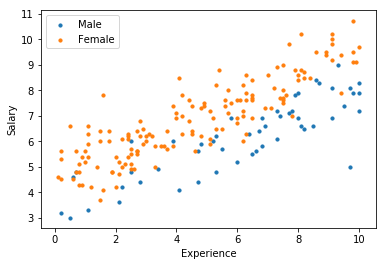

In [5]:
# plots
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male')
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.legend()
plt.show()

In [6]:
## 독립변수들
X = data.iloc[:, 1:]

# rescaled_X 
normalized_X = (X[['experience','salary']]-X[['experience','salary']].mean())/X[['experience','salary']].std()
normalized_X['bias'] = X['bias']
cols = normalized_X.columns.tolist()
cols = cols[-1:] + cols[:-1]
normalized_X = normalized_X[cols]
normalized_X = normalized_X.values.tolist()
X= np.array(normalized_X)


#Basic_X
# X = X.values.tolist()
# X = np.array(X)
#X

# 종속변수 Target = T 
T = data['Label']
T = T.values.tolist()
T = np.array(T)
#T

# 회귀계수
beta = np.random.randn(3)
#beta= np.array([1,1,1])
#beta
print(beta)

[-0.90588092  0.19385427  1.24759064]


## 회귀식
## $$ a_n=B^TX = \hat{B}_0 +\hat{B}_1x_1 +\hat{B}_2x_2 ,    \quad\mbox{n=데이터 수}$$




In [7]:
# 내적 -> 회귀계수와 X의 선형결합 
a = X.dot(beta)



## $$ \mbox 로그오즈 = 회귀식을\  p에\  대해서\  정리 $$
## $$ log(Odds) = \hat{B}_0 +\hat{B}_1x_1 + \hat{B}_2x_2 $$
## $$ \mbox P는 \ 로지스틱 \ 함수 $$
## $$ P = \frac{\mathrm{1} }{\mathrm{1} + e^{-a_n}} = \sigma(x,B) $$ 

In [8]:
'''
함수를 구현하세요 
INPUT: 회귀식(a)
Output: P
'''
P = 1/ (1 + np.exp(-a))


## $$ \mbox 각\  데이터가\  따르는\  확률분포를\   label\  y와\  엮어서\  표현  $$

## $$ P(x_i,y_i | B) = \begin{cases} \sigma(x,B)^{y}, & \mbox{if }y\mbox{ = 1} \\ (1-\sigma(x,B))^{1-y}, & \mbox{if }y\mbox{ = 0} \end{cases} $$

## $$ \mbox 위의 \ 확률분포를 \ 따르는 \   데이터에서 \ 얻은 \ Likelihood  $$

## $$ L = \sigma(x,B)^{y}(1-\sigma(x,B))^{1-y} $$ 

## $$ \mbox log 변환  $$

## $$ L^*=log(L) = y\sigma(x,B) + (1-y)(1-\sigma(x,B)) $$ 

## $$ \mbox Convex\  function으로\  만들기\  위한 \ (-) 곱   $$

## $$ \mbox J는\ Loss\ Function  $$

## $$ J= - L^* $$

## $$ \mbox Loss\ function \ = \ Negative\ log \ likelihood\  $$

## $$ \mbox N개의 \ 데이터에\ 대한\ Negative\ Likelihood  $$
## $$ J(x_i,y_i|B) = -1/N(\sum_{i=1}^N y_i\sigma(x_i,B)+ \sum_{i=1}^N(1-y_i)(1-\sigma(x_i,B))) $$ 


In [9]:
'''
Negative_Likelihood를 구현하세요
INPUT: P, Y(LABEL)
OUTPUT : 각 데이터들의 Negative_Likelihood 값의 합

'''

#loss function
def Loss(X):
    output = 0
    for i in range(0,len(X)):
        if X[i] == 1:
             output = output - np.log(P[i])
        elif X[i] == 0:
             output = output - np.log(1-P[i])
    return (output / len(X))

Loss(T) #평균 Loss

0.8481296647721286

## Loss function 에 대한 Gradient를 구하기 위한 작업 

## $$ \mbox J를 \ B에 \ 대해서\ 편미분  $$

## $$ \mbox J는 \ P에 \ 대한\ 함수이고, \ P는 \ a에 \ 대한 \ 함수이고,\ a는\ B에 \ 대한\ 함수  $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} $$ 

## $${\partial J\over\partial P_i} = \frac{y_i}{P_i}- \frac{1-y_i}{1-P_i} ,\quad {\partial P_i\over\partial a_i} = P_i(1-P_i), \quad {\partial a_i\over\partial B}=X^T $$ 

## $$ \mbox 또한 \ B는 \ B_0,\ B_1,\ B_2이\  있어서\ 각각\ 편미분    $$
## $$ \mbox 간단하게 \  표현하면   $$

## $${\partial J\over\partial B} =  -\sum_{i=1}^N {\partial J\over\partial P_i} {\partial P_i\over\partial a_i} {\partial a_i\over\partial B} = - X^T(y-P) =  X^T(P-y)$$ 

In [10]:
'''
위에서 구한 Negative Likelihood 함수를 각각 베타에 편미분하여 Gradient를 계산하고
Learning_rate와 곱하여 회귀계수를 업데이트 해주세요.
회귀계수가 업데이트 될 때 마다, P도 다시 업데이트 되야 합니다. 
'''

#10만번? 1000번 돌려서 loss가 작아질 때 까지 돌리기
#처음에 베타값을 랜덤생성해서 강의자료의 베타를 업데이트 하는 방법으로 베타를 업데이트함(loss가 작아질 때 까지)

from random import *
import random


def Beta_hat(X):
    #T,P다시 적음 <함수 안에서 전역변수를 수정할 수 없기때문에
    #T
    T = data['Label']
    T = T.values.tolist()
    T = np.array(T)
    #P
    P = 1/ (1 + np.exp(-a))
    #베타 초기값을 난수로 생성
    beta = np.random.randn(3)
    #10만번 반복하면서 베타와 P 업데이트
    for i in range(0,10**5): #10만으로 고치기
        gradient = (np.transpose(X).dot(P-T)) / 200 
        #베타 업데이트
        beta = beta - 0.05 * gradient #learning rate = 0.05 
        #P 업데이트
        P = 1 / (1+np.exp(-X.dot(beta))) 
    #Loss찍기
    output = 0
    for i in range(0,len(T)):
        if T[i] == 1:
             output = output - np.log(P[i])
        elif T[i] == 0:
             output = output - np.log(1-P[i])
    Loss = output / 200
    print(Loss)
    #베타 추정값 리턴
    return(beta)

beta = Beta_hat(X)

0.28739165033216735


C:\Users\dmstj\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


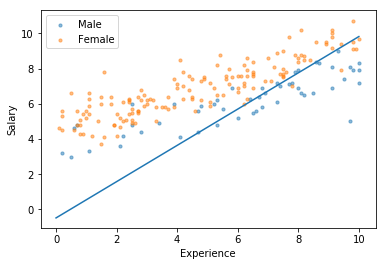

In [11]:
'''추정된 회귀계수가 beta=[B0,B2,B3]이라면, 다음 코드를 통해 시각화가 가능합니다'''


fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male',alpha=0.5)
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female',alpha=0.5)
#plt.scatter(X[:,1], X[:,2],c=T , s=10, alpha=0.8)
x_axis = np.linspace(0, 10,50)
y_axis = -(beta[0] + x_axis*beta[1]) / beta[2]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()


### 직접 구현을 한 rough한 GD이기 때문에 성능이 안좋을 수 있습니다
### 초기값에 매우 민감하며, 기타 하이퍼 파라미터에 따라 성능이 달라집니다